In [1]:
# imports
import requests
import pandas as pd
# from census import Census
import matplotlib.pyplot as plt
import datetime
from scipy.stats import linregress

# api keys
from config import wkey, epakey, censuskey, epaemail
# from config import gkey

# access maps
# gmaps.configure(api_key=gkey)

In [ ]:
# Abby's section starts here

In [2]:
# PurpleAir API

purple_air_df = pd.DataFrame()
purple_air_df['Index'] = [x for x in range(10000)]
purple_air_df = purple_air_df.set_index('Index')
purple_air_df['PLat'] = ""
purple_air_df['PLng'] = ""
purple_air_df['PLocation'] = ""
purple_air_df['PPM2_5'] = ""
purple_air_df['PTemp'] = ""
purple_air_df['PHumd'] = ""
purple_air_df['PPressure'] = ""
purple_air_df['PDataDate'] = ""
purple_air_df['PStats'] = ""

base_url = "https://www.purpleair.com/json"
response = requests.get(base_url).json()

for index, row in purple_air_df.iterrows():
    
    try:
        purple_air_df.loc[index, 'PLat'] = response['results'][index]['Lat']
        purple_air_df.loc[index, 'PLng'] = response['results'][index]['Lon']
        purple_air_df.loc[index, 'PLocation'] = response['results'][index]['DEVICE_LOCATIONTYPE']
        purple_air_df.loc[index, 'PPM2_5'] = response['results'][index]['PM2_5Value']
        purple_air_df.loc[index, 'PTemp'] = response['results'][index]['temp_f']
        purple_air_df.loc[index, 'PHumd'] = response['results'][index]['humidity']
        purple_air_df.loc[index, 'PPressure'] = response['results'][index]['pressure']
        purple_air_df.loc[index, 'PDataDate'] = response['results'][index]['LastSeen']
        purple_air_df.loc[index, 'PStats'] = response['results'][index]['Stats']
#         could also pull time since last seen and only grab values from the last hour
    except:
        pass

purple_air_df = purple_air_df.dropna()
purple_air_df

,PLat,PLng,PLocation,PPM2_5,PTemp,PHumd,PPressure,PDataDate,PStats
Index,,,,,,,,,
0,37.2756,-121.964,outside,3.34,53,54,1018.94,1580311135,"{""v"":3.34,""v1"":2.33,""v2"":2.11,""v3"":2.19,""v4"":3..."
1,37.2756,-121.964,,,,,,,
2,30.0538,-95.4946,outside,2.23,52,62,1014.13,1580311807,"{""v"":2.23,""v1"":2.95,""v2"":3.11,""v3"":2.77,""v4"":7..."
3,30.0538,-95.4946,,,,,,,
4,37.7224,-122.439,outside,14.41,52,60,995.23,1580311784,"{""v"":14.41,""v1"":12.81,""v2"":12.45,""v3"":12.5,""v4..."
...,...,...,...,...,...,...,...,...,...
9995,35.1345,-120.616,,,,,,,
9996,48.4845,-120.208,outside,4.8,42,57,958.35,1580311742,"{""v"":4.8,""v1"":5.05,""v2"":4.55,""v3"":4.43,""v4"":3...."
9997,48.4845,-120.208,,,,,,,


In [3]:
mask = (purple_air_df['PDataDate'] != '') & (purple_air_df['PLocation']=='outside')
purple_air_df = purple_air_df.loc[mask,:]
purple_air_df = purple_air_df.astype({'PTemp':'int32'
                                      ,'PPM2_5':'double'
                                      ,'PHumd':'int'
                                      ,'PPressure':'double'
                                      ,'PDataDate':'int64'})
purple_air_df.dtypes

PLat          object
PLng          object
PLocation     object
PPM2_5       float64
PTemp          int32
PHumd          int64
PPressure    float64
PDataDate      int64
PStats        object
dtype: object

In [ ]:
response

In [4]:
purple_air_df = purple_air_df.loc[purple_air_df['PLocation']=='outside']

# get a dataframe masked for only the US locations
mask_us = (purple_air_df['PLat'] > 19.50) & (purple_air_df['PLat'] < 64.85) & (purple_air_df['PLng'] > -161.76) & (purple_air_df['PLng'] < -68.01)
US_purple_air_df = purple_air_df.loc[mask_us,:]

# get a dataframe masked for only MN locations and 'new' data (since Jan 1st, 2020)
mask_mn = (purple_air_df['PLat'] > 43.57) & (purple_air_df['PLat'] < 49.38) & (purple_air_df['PLng'] > -97.20) & (purple_air_df['PLng'] < -89.57) & (purple_air_df['PDataDate'] > 1577836800)
MN_purple_air_df = purple_air_df.loc[mask_mn,:]

MN_purple_air_df

,PLat,PLng,PLocation,PPM2_5,PTemp,PHumd,PPressure,PDataDate,PStats
Index,,,,,,,,,
246,44.9453,-93.2732,outside,36.46,27,54,991.37,1580311823,"{""v"":36.46,""v1"":36.37,""v2"":35.24,""v3"":33.38,""v..."
406,45.0005,-89.5995,outside,0.28,29,63,973.20,1580311828,"{""v"":0.28,""v1"":0.98,""v2"":2.82,""v3"":4.51,""v4"":3..."
958,44.9678,-93.66,outside,23.55,32,44,988.47,1580311811,"{""v"":23.55,""v1"":24.8,""v2"":25.88,""v3"":26.68,""v4..."
1710,45.138,-93.26,outside,11.96,30,45,992.72,1580311817,"{""v"":11.96,""v1"":12.88,""v2"":12.2,""v3"":11.4,""v4""..."
2124,45.0595,-93.2941,outside,21.25,31,48,993.96,1580311816,"{""v"":21.25,""v1"":20.95,""v2"":19.75,""v3"":18.23,""v..."
3278,44.9273,-91.382,outside,16.87,28,57,992.01,1580311859,"{""v"":16.87,""v1"":17.11,""v2"":16.59,""v3"":16.62,""v..."
3644,46.8111,-92.0597,outside,2.87,31,63,1000.46,1580311851,"{""v"":2.87,""v1"":2.27,""v2"":1.75,""v3"":1.8,""v4"":2...."
4188,46.8075,-92.1426,outside,2.82,24,67,973.98,1580311852,"{""v"":2.82,""v1"":2.33,""v2"":3.26,""v3"":3.63,""v4"":2..."
4264,46.7008,-92.0428,outside,10.28,28,54,1002.86,1580311858,"{""v"":10.28,""v1"":8.6,""v2"":8.67,""v3"":8.5,""v4"":5...."


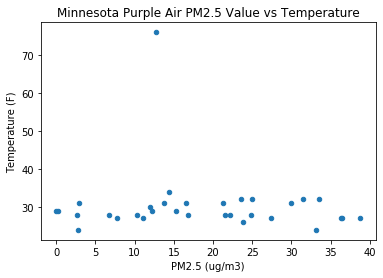

In [5]:
# Plotting data and checking for correlation
MN_purple_air_df.plot.scatter(x='PPM2_5', y='PTemp')
plt.xlabel("PM2.5 (ug/m3)")
plt.ylabel("Temperature (F)")
plt.title("Minnesota Purple Air PM2.5 Value vs Temperature")
plt.savefig("Images/PurpleAirMNPMvsTemp.png")
plt.show()

In [6]:
# Searching for outliers
quartiles = MN_purple_air_df['PTemp'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

MN_purple_air_df = MN_purple_air_df.reset_index(drop=True)

for x in range(len(MN_purple_air_df['PTemp'])):
    if (MN_purple_air_df.iloc[x, 4] > upper_bound) | (MN_purple_air_df.iloc[x,4] < lower_bound):
        print(f"found an outlier with value {MN_purple_air_df.iloc[x,4]}F and removing from dataframe.")
        nooutlier_data_df = MN_purple_air_df.drop([x])


found an outlier with value 76F and removing from dataframe.


The r-squared is: -0.0059


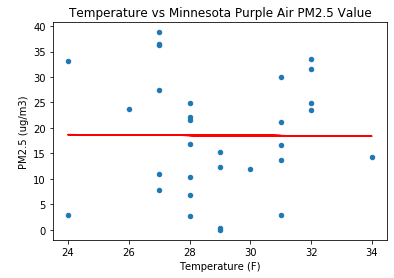

In [7]:
# Plotting data and checking for correlation
nooutlier_data_df.plot.scatter(y='PPM2_5', x='PTemp')
plt.ylabel("PM2.5 (ug/m3)")
plt.xlabel("Temperature (F)")
plt.title("Temperature vs Minnesota Purple Air PM2.5 Value")

y_values = nooutlier_data_df['PPM2_5']
x_values = nooutlier_data_df['PTemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}  r-value = {round(rvalue,4)}"
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (22,34), fontsize=15, color='red')
print(f"The r-squared is: {round(rvalue,4)}")

plt.savefig("Images/PurpleAirMNPMvsTemp-nooutliers.png")
plt.show()

In [ ]:
# regression


In [ ]:
# EPA API
# sample data (lowest granularity date) by box (lat, long range)

lat_lng_range = 0.001

pollutant = '88101'
beginning_date = 20200126
end_date = beginning_date+1

# locations = purple_air_df[['PLat', 'PLng']]
# lat_range = pd.DataFrame()
# lat_range['Min Lat'] = locations.loc[:,'PLat'] - lat_lng_range
# lat_range['Max Lat'] = locations.loc[:,'PLat'] + lat_lng_range
# lng_range = pd.DataFrame()
# lng_range['Min Lng'] = locations.loc[:,'PLng'] - lat_lng_range
# lng_range['Max Lng'] = locations.loc[:,'PLng'] + lat_lng_range

# for minvalue, maxvalue in (zip(lat_range, lng_range)):
# #     for minlng, maxlng in lng_range:

#     base_url = "https://aps.eap.gov/data/api/sampleData/byBox?"
#     url = f'{base_url}email={epaemail}&key={epakey}&param={pollutant}&bdate={beginning_date}&edate={end_date}&minlat={minvalue}&maxlat={maxvalue}&minlon={minvalue}&maxlon={maxvalue}'
#     response = requests.get(url).json()
#     print(response)
#     #     try:
    

# minlat = 37.2756-0.001
# maxlat = 37.2756+0.001
# minlng = -121.964-0.001
# maxlng = -121.964+0.001

minlat = 46.7296
maxlat = 46.7396
minlng = 94.6859
maxlng = 94.6959

epakey = 'amberhawk52'
epaemail = 'helloniharika@gmail.com'

base_url = "https://aps.eap.gov/data/api/sampleData/byBox?"
url = f'{base_url}email={epaemail}&key={epakey}&param={pollutant}&bdate={beginning_date}&edate={end_date}&minlat={minlat}&maxlat={maxlat}&minlon={minlng}&maxlon={maxlng}'
response = requests.get(url).json()
print(response)
        

# ex: https://aqs.epa.gov/data/api/sampleData/byBox?email=test@aqs.api&key=test&param=44201&bdate=20150501&edate=20150502&minlat=33.3&maxlat=33.6&minlon=-87.0&maxlon=-86.7
# https://aqs.epa.gov/data/api/sampleData/byBox?email=abby.lemon22@gmail.com&key=indigogoose44&param=88101&bdate=20200126&edate=20200127&minlat=37.2746&maxlat=37.2766&minlon=-121.963&maxlon=-121.965

In [8]:
# EPA API
# EPA Air Quality Section
# yearly data by state (minnesota)

pm2_5_1Hour = []
pm2_5_24HourBulk = []
pm2_5_24Hour = []
year_list = []
years = [x for x in range(1990,2020)]

email = 'abby.lemon22@gmail.com'
state_code = "27" 
# PM2.5 - Local Conditions
pollutant = "88101"

for year in years:
    beginging_date = f"{year}0502"
    end_date = f"{year}0502"
    base_url = "https://aqs.epa.gov/data/api/annualData/byState?"
    url = f'{base_url}email={email}&key={epakey}&param={pollutant}&bdate={beginging_date}&edate={end_date}&state={state_code}'
    response = requests.get(url).json()
    try:
        pm2_5_1Hour.append(response['Data'][0]['arithmetic_mean'])
        pm2_5_24HourBulk.append(response['Data'][1]['arithmetic_mean'])
        pm2_5_24Hour.append(response['Data'][5]['arithmetic_mean'])
        year_list.append(response['Data'][0]['year'])
    except:
        print(f"No data found, skip {year}.")
        pass



In [9]:
pm2_5_df = pd.DataFrame([year_list,pm2_5_1Hour,pm2_5_24HourBulk,pm2_5_24Hour]).T
pm2_5_df = pm2_5_df.rename(columns={0:'Year',
                                    1:'PM 2.5 1 hour',
                                    2:'PM 2.5 24 hour bulk',
                                    3:'PM 2.5 24 hour'
})
pm2_5_df['Year'] = pm2_5_df['Year'].astype(int)
# pm2_5_df['PM 2.5'] = pm2_5
pm2_5_df.to_csv("Resource/EPAData_per_year_MN.csv")
pm2_5_df

,Year,PM 2.5 1 hour,PM 2.5 24 hour bulk,PM 2.5 24 hour
0,1999,10.050000,10.050000,11.355556
1,2000,9.532353,9.532353,12.748649
2,2001,12.737931,12.737931,8.647368
3,2002,10.081034,10.081034,9.828829
4,2003,7.150000,7.150000,9.376316
5,2004,8.204545,8.204545,5.416949
6,2005,10.305128,10.305128,6.614035
7,2006,8.764706,8.764706,6.421311
8,2007,9.593966,9.593966,8.778571
9,2008,9.490598,9.490598,10.006667


In [10]:
pm_plot = pm2_5_df.plot(kind='line', x='Year',y=['PM 2.5 1 hour','PM 2.5 24 hour bulk','PM 2.5 24 hour'],grid=True)
plt.ylabel('PM2.5 (ug/m3)')
plt.title("Year vs Annual Mean PM2.5 Value")
plt.savefig("Images/YearvsAnnualMeanPM2_5Value.png")
plt.show()

In [ ]:
# Census API
# Thinking I might not need to pull Census data.

c = Census(censuskey, year=2018)
# need to get this working for 2019, what is the difference between 2010 and 2019?
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E", "B19301_001E", "B17001_002E"), {'for': 'zip code tabulation area:*'})

census_pd = pd.DataFrame(census_data)
census_pd

In [ ]:
# Abby's section ends here

In [ ]:
# Alan's section starts here

In [ ]:
temp = "Resource/temp data.csv"
temp_df = pd.read_csv(temp, encoding="utf-8")
temp_df

In [ ]:
new_temp_df = temp_df.loc[:, ["Date", "Maximum Temperature degrees (F)"]]
new_temp_df

In [ ]:
new_temp_df.dtypes

In [ ]:
new_temp_df["Date"] = pd.to_datetime(new_temp_df["Date"], errors="coerce")
new_temp_df

In [ ]:
new_temp_df['Year'] = pd.DatetimeIndex(new_temp_df["Date"]).year
new_temp_df.head()

In [ ]:
temp_year = new_temp_df.groupby("Year")["Maximum Temperature degrees (F)"].mean()
temp_year

In [ ]:
temp_summary = pd.DataFrame(temp_year)
temp_summary

In [ ]:
PM_data = "Resource/EPAData_per_year_MN.csv"
PM_data_df = pd.read_csv(PM_data, encoding="utf-8", index_col="Year")
PM_data_df

In [ ]:
PM_data_df.drop(['Unnamed: 0'], axis=1)

In [ ]:
Temp_pm_summary_df = pd.merge(temp_summary, PM_data_df, on='Year')
Temp_pm_summary_df

In [ ]:
Temp_pm_summary_df.drop(['Unnamed: 0'], axis=1)

In [ ]:
Temp_pm_summary_df = Temp_pm_summary_df.round(decimals=1)
Temp_pm_summary_df

In [ ]:
Temp_pm_summary_df = Temp_pm_summary_df.drop(['Unnamed: 0'], axis=1)
Temp_pm_summary_df = Temp_pm_summary_df.reset_index()
Temp_pm_summary_df

In [ ]:
bar_chart_temp = Temp_pm_summary_df.plot.bar(x="Year", y="PM 2.5 24 hour"
                                         , facecolor = "red", edgecolor = "black", legend=False)

plt.title("Year vs. Yearly Mean PM 2.5 24 Hour Data")
plt.xlabel("Year")
plt.ylabel("Annual Mean PM 2.5 24 Hour Data")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()

plt.savefig("Images/Year vs. Yearly Mean PM 2.5 24 Hour Data.png")

In [ ]:
bar_chart_PM = Temp_pm_summary_df.plot.bar(x="Year", y="Maximum Temperature degrees (F)"
                                         , facecolor = "skyblue", edgecolor = "black", legend=False)

plt.title("Year vs. Yearly Mean Max Temperature (°F)")
plt.xlabel("Year")
plt.ylim(+50)
plt.ylabel("Yearly Mean Max Temperature (°F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()

plt.savefig("Images/Year vs. Yearly Mean Max Temperature (°F).png")

In [ ]:
Temp_PM_scatter = Temp_pm_summary_df.plot.scatter(x="Maximum Temperature degrees (F)", y="PM 2.5 24 hour"
                                         , facecolor = "Green", edgecolor = "black")

plt.title("Yearly Mean Max Temperature (°F) vs. Yearly Mean PM 2.5 24 Hour Data")
plt.xlabel("Yearly Mean Max Temperature (°F)")
# plt.ylim(+50)
plt.ylabel("Yearly Mean PM 2.5 24 Hour Data")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()

In [ ]:
Temp_pm_summary_df.dtypes

In [ ]:
Temp_PM_scatter = Temp_pm_summary_df.plot.scatter(x="Maximum Temperature degrees (F)", y="PM 2.5 24 hour"
                                         , facecolor = "Green", edgecolor = "black")
x_values = Temp_pm_summary_df['Maximum Temperature degrees (F)']
y_values = Temp_pm_summary_df['PM 2.5 24 hour']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Yearly Mean Max Temperature (°F) vs. Yearly Mean PM 2.5 24 Hour Data")
plt.xlabel("Yearly Mean Max Temperature (°F)")
plt.ylabel("Yearly Mean PM 2.5 24 Hour Data")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
print(f"The r-squared is: {rvalue}")
# plt.tight_layout()
plt.show()

In [ ]:
plt.savefig("Images/Scatter.png")

In [ ]:
# Alan's section ends here

In [ ]:
# Brandon's section starts here

In [ ]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import requests
from census import Census
from us import states
from config import epakey, censuskey

c = Census(censuskey)

In [ ]:
# Run Census Search to retrieve data on all counties in all states
# The c.acs5.get is from the census wrapping in a github repo
census_data_1 = c.acs5.get(("NAME", "B05012_001E"), {"for": "county:*"}, year = 2016)

# Convert to DataFrame
census_2016 = pd.DataFrame(census_data_1)

# Column Reordering
census_2016 = census_2016.rename(columns={"B05012_001E": "Population", "NAME": "Name", "county": "County"})

census_mn_1 = census_2016[census_2016["Name"].str.contains("Minnesota")]
census_mn_2016 = pd.concat([census_mn_1, census_mn_1["Name"].str.split(',', expand=True)], axis=1)
census_mn_2016 = census_mn_2016.rename(columns={0: "County", 1: "State Name", "County": "County Code"})
census_mn_2016["County"] = census_mn_2016["County"].str.replace("County", '')
census_mn_2016["County"] = census_mn_2016["County"].str.strip()
del census_mn_2016["Name"]

census_mn_2016.head()


In [ ]:
census_data_2 = c.acs5.get(("NAME", "B05012_001E"), {"for": "county:*"}, year = 2017)

# Convert to DataFrame
census_2017 = pd.DataFrame(census_data_2)

# Column Reordering
census_2017 = census_2017.rename(columns={"B05012_001E": "Population", "NAME": "Name", "county": "County"})

census_mn_2 = census_2017[census_2017["Name"].str.contains("Minnesota")]
census_mn_2017 = pd.concat([census_mn_2, census_mn_2["Name"].str.split(',', expand=True)], axis=1)
census_mn_2017 = census_mn_2017.rename(columns={0: "County", 1: "State Name", "County": "County Code"})
census_mn_2017["County"] = census_mn_2017["County"].str.replace("County", '')
census_mn_2017["County"] = census_mn_2017["County"].str.strip()
del census_mn_2017["Name"]

census_mn_2017.head()


In [ ]:
census_data_3 = c.acs5.get(("NAME", "B05012_001E"), {"for": "county:*"}, year = 2018)

# Convert to DataFrame
census_2018 = pd.DataFrame(census_data_3)

# Column Reordering
census_2018 = census_2018.rename(columns={"B05012_001E": "Population", "NAME": "Name", "county": "County"})

census_mn_3 = census_2018[census_2018["Name"].str.contains("Minnesota")]
census_mn_2018 = pd.concat([census_mn_3, census_mn_3["Name"].str.split(',', expand=True)], axis=1)
census_mn_2018 = census_mn_2018.rename(columns={0: "County", 1: "State Name", "County": "County Code"})
census_mn_2018["County"] = census_mn_2018["County"].str.replace("County", '')
census_mn_2018["County"] = census_mn_2018["County"].str.strip()
del census_mn_2018["Name"]

census_mn_2018.head()


In [ ]:
#read in EPA csv files
epa_aqi_2016 = pd.read_csv("AQI_2016.csv")
epa_aqi_2017 = pd.read_csv("AQI_2017.csv")
epa_aqi_2018 = pd.read_csv("AQI_2018.csv")

epa_aqi_mn_2016 = epa_aqi_2016[epa_aqi_2016["State"].str.contains("Minnesota")]
epa_aqi_mn_2017 = epa_aqi_2017[epa_aqi_2017["State"].str.contains("Minnesota")]
epa_aqi_mn_2018 = epa_aqi_2018[epa_aqi_2018["State"].str.contains("Minnesota")]

epa_aqi_mn_2018.head(10)

In [ ]:
census_mn_2016["County"] = census_mn_2016["County"].astype(str)
epa_aqi_mn_2016["County"] = epa_aqi_mn_2016["County"].astype(str)

df1 = epa_aqi_mn_2016.merge(census_mn_2016, on = "County")

df1.head()

In [ ]:
population_2016 = df1.iloc[:, 19]
air_2016 = df1.iloc[:, 4]
aqi_days_2016 = df1.iloc[:, 3]
df1["Air Quality"] = (air_2016 / aqi_days_2016)*100

air_quality_2016 = df1.iloc[:, 23]
six_slope, six_int, six_r, six_p, six_std_err = stats.linregress(population_2016, air_quality_2016)
six_fit = six_slope * population_2016 + six_int
line_1 = "y = " + str(round(six_slope, 6)) + "x + " + str(round(six_int, 2))
plt.scatter(population_2016, air_quality_2016)
plt.plot(population_2016, six_fit,"-", color = "red")
plt.title("Population vs. Percentage of Good Days")
plt.xlabel("Population")
plt.ylabel("% Good Days")
plt.annotate(line_1, (33375, 70), fontsize=20, color = "red")
plt.tight_layout()
plt.savefig("Images/population_v_gooddays2016.png")
plt.show()
print(f"R squared: {six_r ** 2}")

df1.head(25)

In [ ]:
census_mn_2017["County"] = census_mn_2017["County"].astype(str)
epa_aqi_mn_2017["County"] = epa_aqi_mn_2017["County"].astype(str)

df2 = epa_aqi_mn_2017.merge(census_mn_2017, on = "County")

df2.head()

In [ ]:
population_2017 = df2.iloc[:, 19]
air_2017 = df2.iloc[:, 4]
aqi_days_2017 = df2.iloc[:, 3]
df2["Air Quality"] = (air_2017 / aqi_days_2017)*100

air_quality_2017 = df2.iloc[:, 23]
seven_slope, seven_int, seven_r, seven_p, seven_std_err = stats.linregress(population_2017, air_quality_2017)
seven_fit = seven_slope * population_2017 + seven_int
line_2 = "y = " + str(round(seven_slope, 6)) + "x + " + str(round(seven_int, 2))
plt.scatter(population_2017, air_quality_2017)
plt.plot(population_2017, seven_fit,"-", color = "red")
plt.title("Population vs. Percentage of Good Days")
plt.xlabel("Population")
plt.ylabel("% Good Days")
plt.annotate(line_2, (33375, 60), fontsize=20, color = "red")
plt.tight_layout()
plt.savefig("Images/population_v_gooddays2017.png")
plt.show()
print(f"R squared: {seven_r ** 2}")

df2.head(25)

In [ ]:
census_mn_2018["County"] = census_mn_2018["County"].astype(str)
epa_aqi_mn_2018["County"] = epa_aqi_mn_2018["County"].astype(str)

df3 = epa_aqi_mn_2018.merge(census_mn_2018, on = "County")

df3.head()

In [ ]:
population_2018 = df3.iloc[:, 19]
air_2018 = df3.iloc[:, 4]
aqi_days_2018 = df3.iloc[:, 3]
df3["Air Quality"] = (air_2018 / aqi_days_2018)*100

air_quality_2018 = df3.iloc[:, 23]
eight_slope, eight_int, eight_r, eight_p, eight_std_err = stats.linregress(population_2018, air_quality_2018)
eight_fit = eight_slope * population_2018 + eight_int
line_3 = "y = " + str(round(eight_slope, 6)) + "x + " + str(round(eight_int, 2))
plt.scatter(population_2018, air_quality_2018)
plt.plot(population_2018, eight_fit,"-", color = "red")
plt.title("Population vs. Percentage of Good Days")
plt.xlabel("Population")
plt.ylabel("% Good Days")
plt.annotate(line_3, (300000, 90), fontsize=20, color = "red")
plt.tight_layout()
plt.savefig("Images/population_v_gooddays2018.png")
plt.show()
print(f"R squared: {eight_r ** 2}")

df3.head(25)

In [ ]:
#pull air quality from Milwaukee County (population is similar to hennepin county?)
census_data_4 = c.acs5.get(("NAME", "B05012_001E"), {"for": "county:*"}, year = 2016)

# Convert to DataFrame
census_2016 = pd.DataFrame(census_data_1)

# Column Reordering
census_2016 = census_2016.rename(columns={"B05012_001E": "Population", "NAME": "Name", "county": "County"})

census_mke_1 = census_2016[census_2016["Name"].str.contains("Milwaukee")]
census_mke_2016 = pd.concat([census_mke_1, census_mke_1["Name"].str.split(',', expand=True)], axis=1)
census_mke_2016 = census_mke_2016.rename(columns={0: "County", 1: "State Name", "County": "County Code"})
census_mke_2016["County"] = census_mke_2016["County"].str.replace("County", '')
census_mke_2016["County"] = census_mke_2016["County"].str.strip()
del census_mke_2016["Name"]

census_mke_2016.head()

In [ ]:
epa_aqi_mke_2016 = epa_aqi_2016[epa_aqi_2016["County"].str.contains("Milwaukee")]
epa_aqi_mke_2016

In [ ]:
air_mke = epa_aqi_mke_2016.iloc[:, 4]
aqi_days_mke = epa_aqi_mke_2016.iloc[:, 3]
epa_aqi_mke_2016["Air Quality"] = (air_mke / aqi_days_mke)*100
epa_aqi_mke_2016

In [ ]:
mke_estimation = ((-2.4E-5 * 955306.0) + 96.26)
mke_actual = 74.31694
mke_numbers = [mke_estimation, mke_actual]
x_axis = ["Estimated", "Actual"]
plt.bar(x_axis, mke_numbers, facecolor="red", alpha=0.75, align="center")
plt.title("Prediction of Air Quality for MKE")
plt.xlabel("Value")
plt.ylabel("% Good Days")
plt.xlim(-0.75, 1.75)
plt.ylim(70, 76)
plt.tight_layout()
plt.savefig("Images/MKE_estimate2016.png")
plt.show()

In [ ]:
# Brandon's section ends here